### Activity 1: The Gradient Descent Simulation

##### Goal: Visualize how Gradient Descent optimizes parameters using a simple cost function: $J(\theta)=2\theta^{2}-4\theta$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(start_theta, learning_rate, n_iterations):
    theta = start_theta
    history = []
    for i in range(n_iterations):
        history.append(theta)
        # Derivative dJ/dtheta = 4theta - 4
        gradient = 4 * theta - 4
        theta = theta - learning_rate * gradient 
    return history

# 1. Implementation with learning rate 0.1
iterations = 10
history_converge = gradient_descent(start_theta=4, learning_rate=0.1, n_iterations=iterations) 

print("Theta values at each step (LR=0.1):")
for i, val in enumerate(history_converge):
    print(f"Step {i}: {val:.4f}")

Theta values at each step (LR=0.1):
Step 0: 4.0000
Step 1: 2.8000
Step 2: 2.0800
Step 3: 1.6480
Step 4: 1.3888
Step 5: 1.2333
Step 6: 1.1400
Step 7: 1.0840
Step 8: 1.0504
Step 9: 1.0302


#### Does it converge?
* Yes, the values approach $\theta=1$, which is the minimum where the derivative $4(1)-4=0$. 4

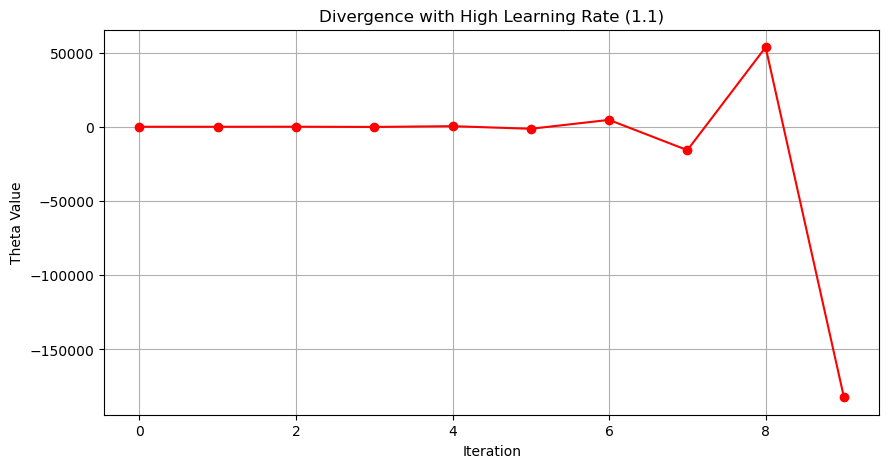

In [ ]:
# 2. Run with learning rate 1.1
history_diverge = gradient_descent(start_theta=4, learning_rate=1.1, n_iterations=iterations) 

plt.figure(figsize=(10, 5))
plt.plot(range(iterations), history_diverge, marker='o', color='red')
plt.title("Divergence with High Learning Rate (1.1)")
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.grid(True)
plt.show() 

#### Conceptual Answers:


* Overshooting: When the learning rate is too high (1.1), the update step is so large that it jumps over the minimum and lands even further away on the opposite side. Each subsequent step increases this distance, causing the parameter to diverge rather than settle. 



* Convexity: LinearRegression uses Ordinary Least Squares (OLS), which is a convex optimization problem. Convex functions have a single global minimum (like a bowl shape), meaning any gradient descent path will eventually find it. Complex models like deep neural networks have "non-convex" surfaces with many "Local Optima" (valleys that aren't the deepest), where the algorithm can get stuck.

### Activity 2: K-Nearest Neighbors (KNN) & "The Lazy Learner" 


* Goal: Classify flower species using the Iris dataset.

In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import plotly.express as px
# 1. Implementation

iris = load_iris()
X, y = iris.data, iris.target 


In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 

mystery_flower = [[5.1, 3.5, 1.4, 0.2]] 
prediction = knn.predict(mystery_flower)
print(f"Predicted Class: {iris.target_names[prediction][0]}")

Predicted Class: setosa


In [5]:
# 2. Feature Inspection
distances, indices = knn.kneighbors(mystery_flower) 
print(f"Indices of neighbors: {indices}") 
print(f"Classes of neighbors: {y[indices]}") 

Indices of neighbors: [[ 0 17  4]]
Classes of neighbors: [[0 0 0]]


Conceptual Answers:
* Voting: Based on the classes of the 3 neighbors, if all indices correspond to the same target class, the vote was unanimous.If the array y[indices] contains different numbers, the vote was split.

* The "Lazy" Learner: KNN is a "Lazy Learner" because the fit() function does not learn a mathematical formula like $\theta^{T}x$. It simply stores (memorizes) the training data.For massive datasets (10M rows), this makes prediction very slow because the computer must calculate the distance between the new point and all 10 million stored points to find the neighbors.

#### Activity 3: Logistic Regression & Decision Boundaries 


* Goal: Train a diagnostic model for Breast Cancer

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 1. Model Training
data = load_breast_cancer() 
X = data.data[:, :2] 
y = data.target

model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [7]:
# 2. Extracting weights
w1, w2 = model.coef_[0] 
b = model.intercept_[0] 

print(f"Weights: w1={w1:.4f}, w2={w2:.4f}, b={b:.4f}")

Weights: w1=-1.0463, w2=-0.2169, b=19.6719


#### Logistic Function Formula
1. The Logistic Function FormulaThe general formula for the probability $P$ is:$$P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}$$Where $z$ is your decision boundary equation:$$z = w_{1} \cdot Radius + w_{2} \cdot Texture + b$$. Applying Your Specific WeightsUsing the weights provided ($w_{1}=-1.0463$, $w_{2}=-0.2169$, $b=19.6719$), the full predictive formula for your model is:$$P(\text{Class 1}) = \frac{1}{1 + e^{-(-1.0463 \cdot Radius - 0.2169 \cdot Texture + 19.6719)}}$$



In [8]:

probabilities = model.predict_proba(X) 

custom_predictions = (probabilities[:, 0] > 0.9).astype(int) 

print(f"Custom Predictions: {custom_predictions}")

Custom Predictions: [0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

| Threshold        | Priority  | Outcome                                                                                                    |
|-----------------|-----------|------------------------------------------------------------------------------------------------------------|
| 0.5 (Default)   | Balance   | Provides balanced accuracy; treats False Negatives (missing cancer) and False Positives (false alarm) with equal weight. |
| 0.1 (Low)       | Recall    | Catches almost every cancer case by being highly sensitive; however, it significantly increases "false alarms" (False Positives). |
| 0.9 (High)      | Precision | Only flags a patient as "Malignant" when the model is extremely certain; this results in many missed cases (False Negatives). |


### Activity 4: Polynomial Regression & Overfitting 


Goal: Demonstrate high variance using housing price data

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Data Generation
np.random.seed(0) 
X = 2-3*np.random.normal(0, 1, 20)
y = X - 2*(X**2) + np.random.normal(-3, 3, 20)
X = X[:, np.newaxis] 



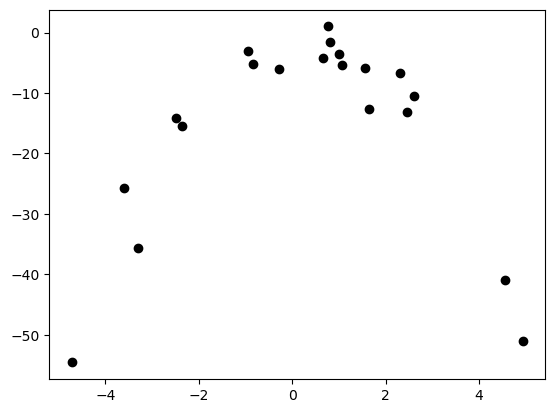

In [27]:
plt.scatter(X, y, color='black', label='Data')

In [29]:
# 2. The Pipeline
model_a = LinearRegression() 
model_b = make_pipeline(PolynomialFeatures(degree=20), LinearRegression()) 

model_a.fit(X, y) 
model_b.fit(X, y) 



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

In [30]:
predictions = model_a.predict(X)
mse = mean_squared_error(y, predictions) 
mae = mean_absolute_error(y, predictions)
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}")

MSE: 264.73, MAE: 12.71


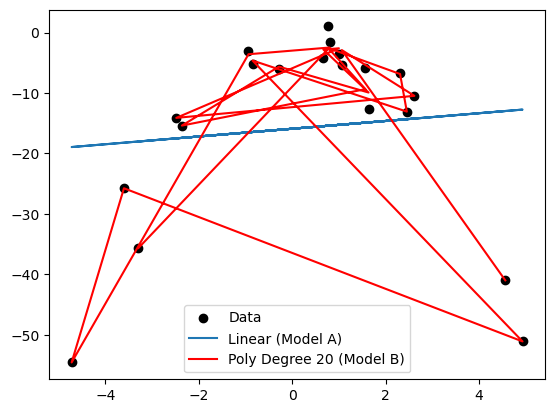

In [31]:
# 3. Visualization
plt.scatter(X, y, color='black', label='Data')

plt.plot(X, model_a.predict(X), label='Linear (Model A)') 
plt.plot(X, model_b.predict(X), label='Poly Degree 20 (Model B)', color='red')
plt.legend()
plt.show()

Conceptual Answers:

* Overfitting/High Variance: Model B wiggles wildly because it is trying to pass through every single noise point in the training data. This is High Variance; while it fits the training set perfectly, it fails to capture the general trend, so it will perform poorly on new data.

In [32]:
# 4. Outlier Impact
y_outlier = y.copy()
y_outlier[0] = 500 
model_a.fit(X, y_outlier)
predictions = model_a.predict(X)

mse = mean_squared_error(y_outlier, predictions) 
mae = mean_absolute_error(y_outlier, predictions)
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}")

MSE: 11532.92, MAE: 47.92


MSE vs MAE:
* MSE increases more drastically. Mathematically, this is because MSE squares the error (e.g., an error of 264.73 becomes 11532.92), which heavily penalizes large outliers compared to MAE, which treats all errors linearly

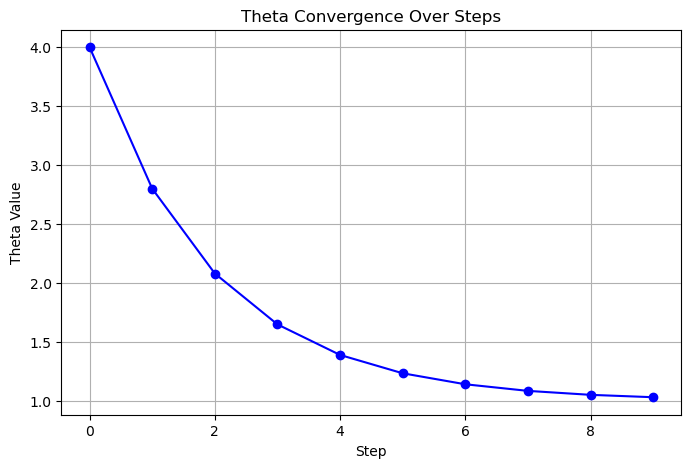

In [33]:
import matplotlib.pyplot as plt

# Theta values at each step
theta_values = [4.0000, 2.8000, 2.0800, 1.6480, 1.3888, 1.2333, 1.1400, 1.0840, 1.0504, 1.0302]
steps = list(range(len(theta_values)))

plt.figure(figsize=(8,5))
plt.plot(steps, theta_values, marker='o', linestyle='-', color='blue')
plt.title("Theta Convergence Over Steps")
plt.xlabel("Step")
plt.ylabel("Theta Value")
plt.grid(True)
plt.show()
